This is a beginner friendly notebook that classifies the data using few models and evaluates the performance. If you are an absolute beginner, this [article](http://medium.com/@joyceannie111/fake-news-detection-using-nlp-techniques-c2dc4be05f99) would explain the concepts in more detail.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


# Analyzing data

In [2]:
real = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
fake = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [3]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Making a new column named 'label' which specifies whether the news is fake or not.

In [5]:
real['label'] = 1
fake['label'] = 0
data = pd.concat([real, fake])

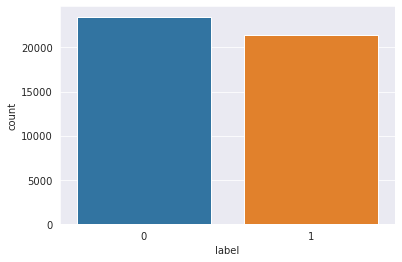

In [6]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(data['label']);

It is clear from the plot that our **data is balanced**.

In [7]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

There are no null values.

In [8]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

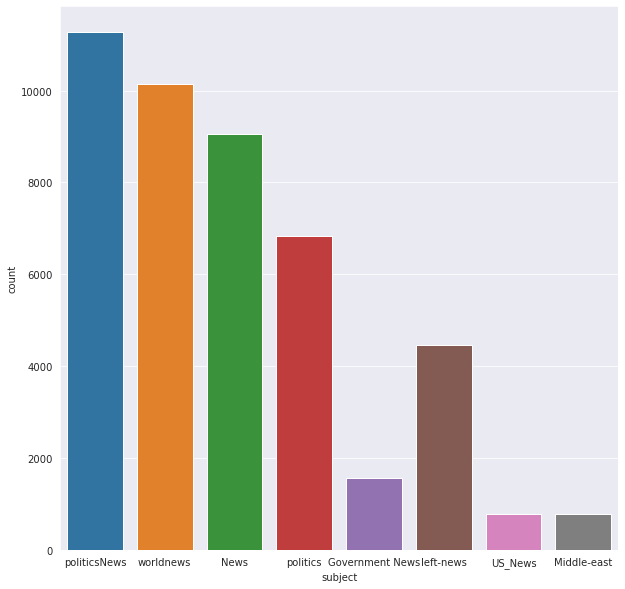

In [9]:
import matplotlib.pyplot as plt
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(data['subject']);

[Text(0, 0, '0'), Text(0, 0, '1')]

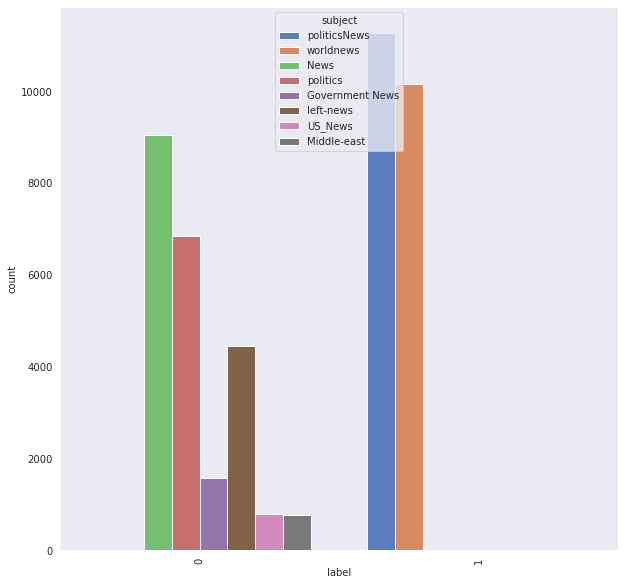

In [10]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

It is clear from the graph that all the genuine news belong to two subjects of political news and world news. Why?

In [11]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title', 'subject', 'date'], axis=1)

# Word clouds

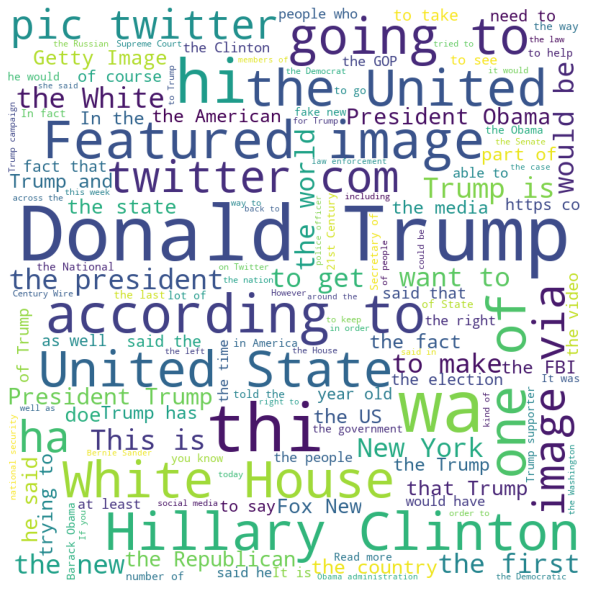

In [12]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 0].text)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

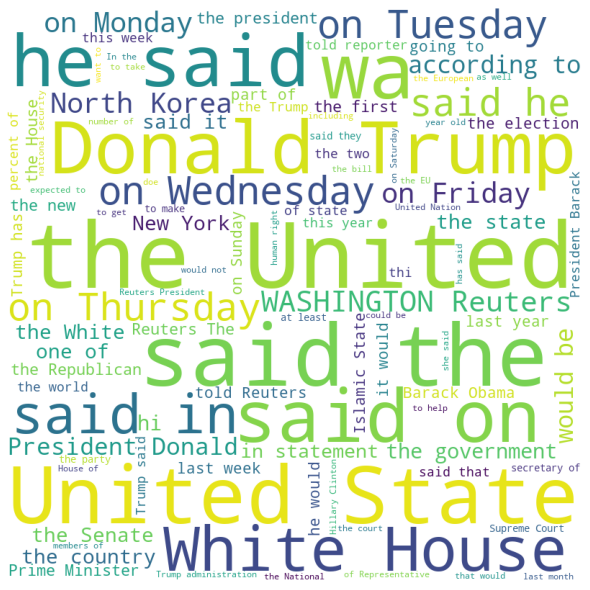

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text)) 
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

There are lot of real and fake news about 'Donald Trump'.

# Classification

We have to split the data and try different classification methods. We will try Naive Bayes, SVM and passive aggessive classifiers. 

In [14]:
#splitting data for training and testing
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)

accuracy:   93.909


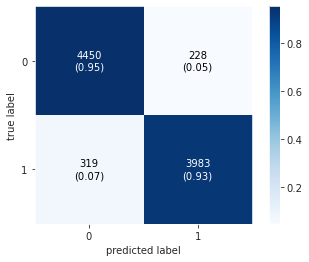

In [15]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()



accuracy:   99.677


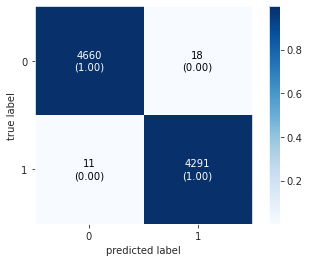

In [16]:
#SVM
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


accuracy:   99.644


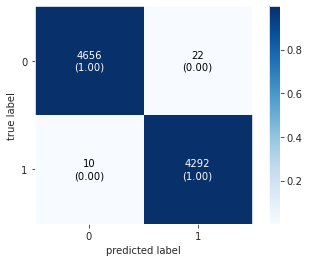

In [17]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

According to our analysis, SVM and passive aggressive classifier have similar performance.

References

* https://www.youtube.com/watch?v=xyq-zYr1cnI     
* https://www.kaggle.com/madz2000/nlp-using-glove-embeddings-99-8-accuracy
* https://www.datacamp.com/community/tutorials/scikit-learn-fake-news